# CS 315 Project #1: Data Visualization (*Group 2*)

**Section 01 - Group 2 Data Visualization Code**

**Written**: Wednesday, February 14, 2024

<a id="sec1"></a>
## 1. Loading in our data

We will load into pandas our data for all data collection runs. Our raw data has been previously cleaned and concatenated together.

Our dataset has the following columns:
- **batchID**: *string* concatenation of "user, "run", "batch", "index"
- **run**: *int* representing 1-5 runs that webdriver preformed
- **batch**: *int* representing batch 1-5 for each individual run
- **index**: *int* representing index value of video per batch
- **saved**: *boolean* True if video was saved, False otherwise
- **author**: *string* representation of video's creator
- **likes**: *int* number of likes
- **comments**: *int* number of comments
- **shares**: *int* number of shares
- **saves**: *int* number of saves
- **music**: *string* representation of sound used in video
- **hashtags**: *list* of hashtags used in video


***NOTE: Change/Update file paths!***

In [28]:
# import all libraries we will need in order to run this notebook
import os, csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter
import urllib

##### Using os we are finding the file path for our data and loading it into a new pandas dataframe.

In [2]:
# Loading in our data
df = pd.read_csv("/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data/master.csv")
df

,batchID,run,batch,index,saved,author,likes,comments,shares,saves,music,hashtags
0,fn_activ_1_1_0,1,1,0,False,ina.katherine,3400000,30200,226400,94800,original sound - ina,NaN
1,fn_activ_1_1_1,1,1,1,False,leci.bby,280200,627,15500,164,original sound - fr0sty_rick,"['fyp%E3%82%B7', 'relatable', 'trending', 'ayl..."
2,fn_activ_1_1_2,1,1,2,False,kassieemariee,689400,2198,73600,6060,original sound - Taj.Mahal,NaN
3,fn_activ_1_1_3,1,1,3,False,caseynicolaxx,29500,107,855,62,Rock With It by Saucy Santana - Saucy Santana,"['fyp', 'foryou', 'foryoupage', 'caseynicola',..."
4,fn_activ_1_1_4,1,1,4,False,jailyneojeda,439800,1313,30800,965,original sound - Jailyne Ojeda,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
8460,ep_cntrl_24_5_19,24,5,19,False,quedivertidotv1,7912,21,362,10,sonido original - Qué Divertido Tv,NaN
8461,ep_cntrl_24_5_20,24,5,20,False,familiapinaoficiial,228200,1110,14700,774,som original - Família.Pina.Oficial,NaN
8462,ep_cntrl_24_5_21,24,5,21,False,itssanya.1,124100,576,10700,109,original sound - Sanya,['@ucoolmediylashes']
8463,ep_cntrl_24_5_22,24,5,22,False,nayelilovera_,46300,662,6843,94,Love songs - ⭐️,"['fyp%E3%82%B7', 'trending', 'fyp', 'foryoupag..."


<a id="sec2"></a>
## 2. Analyzing our data

## **plot_metric_member Part 1**

Creates data frames for one person's control and active account and plots the mean for each run. 

Each plot is saved in folder named "*visualizations*".

##### **Parameters**:
- **Metric**: *str*, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
- **Initial**: *str*, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)

In [14]:
def plot_metric_member(metric, initial, df):
    '''
    Creates data frames for one person's control and active account and plots the mean for each run.

    Parameters:
        Metric: str, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
        Initial: str, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)
    '''
    df_activ = df[df['batchID'].str.contains(f'{initial}_activ')]
    df_cntrl = df[df['batchID'].str.contains(f'{initial}_cntrl')]
    
    # Get descriptive statistic for df by index -- assuming 25 runs
    df_activ_group = df_activ.groupby('run')[[metric]].median()
    df_cntrl_group = df_cntrl.groupby('run')[[metric]].median()
    
    # Graph the average of the chosen metric for both control and active accounts over 25 runs
    sns.set_style('whitegrid')
    # sns.scatterplot(x=range(len(df_activ_group)),y='likes',data=df_activ_group,color='blue')
    # sns.lineplot(x=range(len(df_activ_group)),y='likes',data=df_activ_group,color = 'lightblue')
    sns.scatterplot(x='run',y=metric,data=df_activ_group,color='blue')
    sns.lineplot(x='run',y=metric,data=df_activ_group,color = 'lightblue')

    sns.scatterplot(x='run',y=metric,data=df_cntrl_group,color='green')
    sns.lineplot(x='run',y=metric,data=df_cntrl_group,color = 'lightgreen')

    plt.title(f'Median {metric} for {initial} for Active and Control Groups')
    plt.xlabel('Run Number')

    plt.show()

##### Now we will run **plot_metric_member** once for each member (ep, dl, lg, fg, fn, ss).

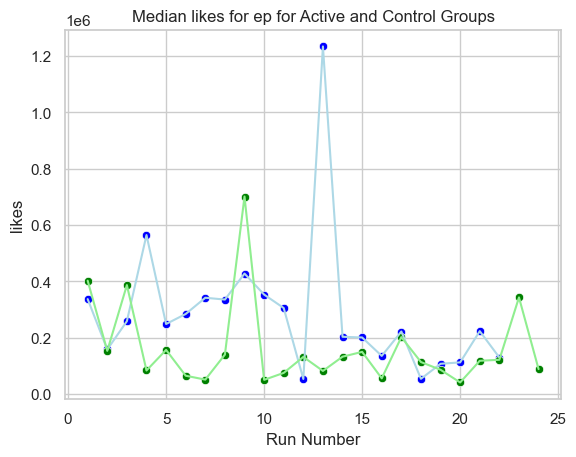

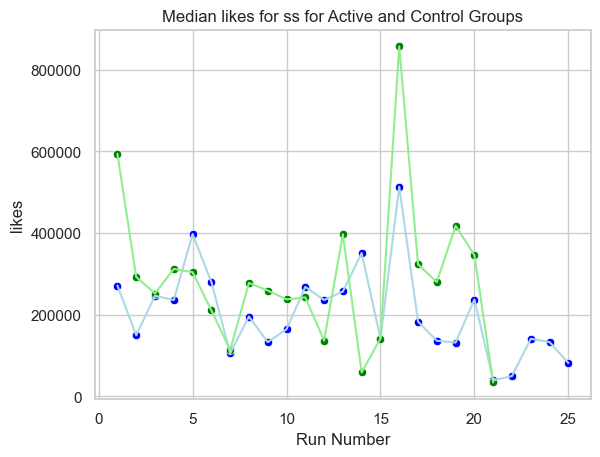

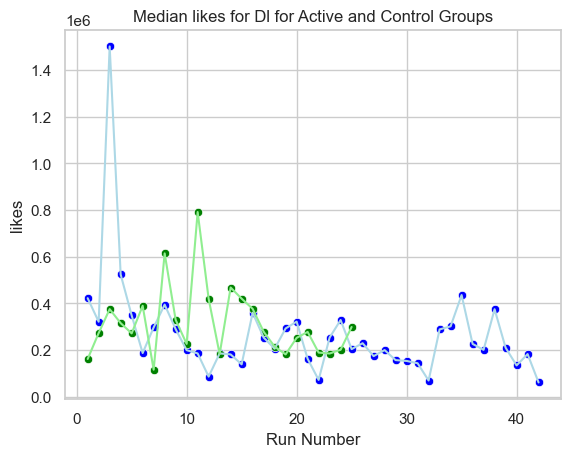

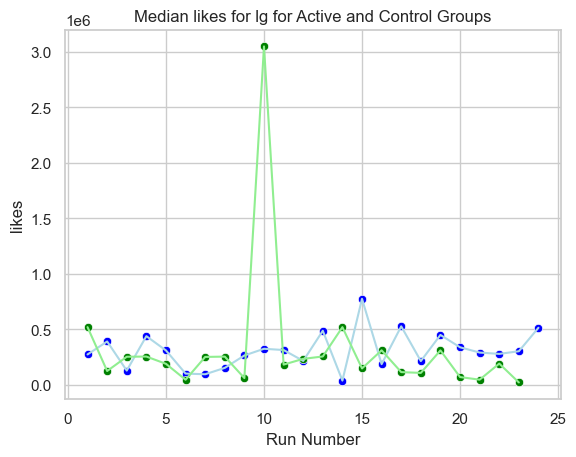

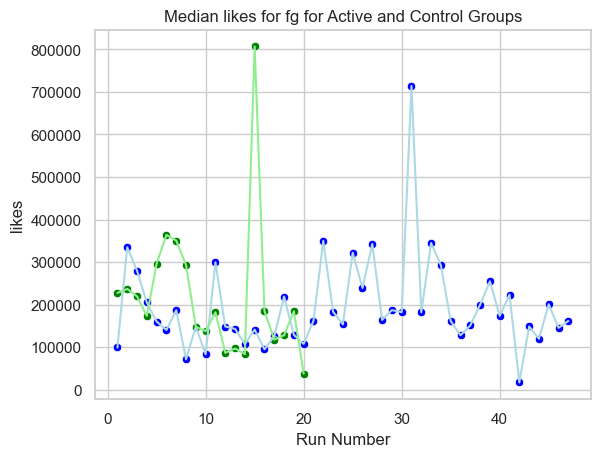

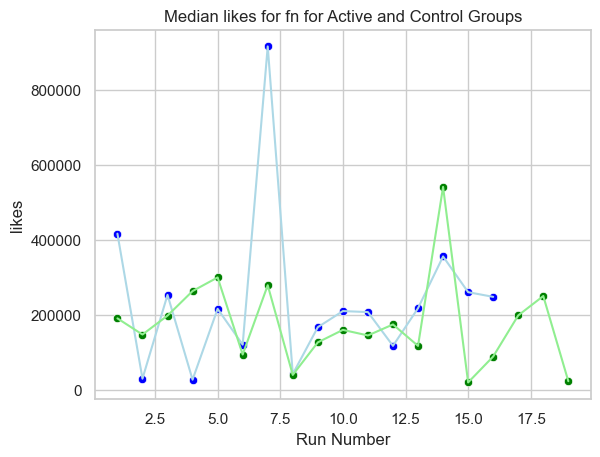

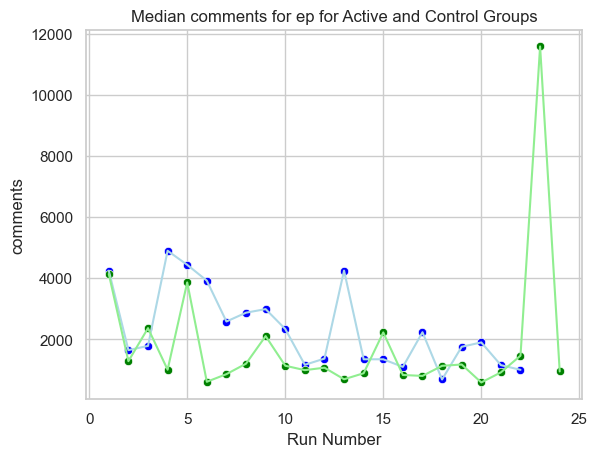

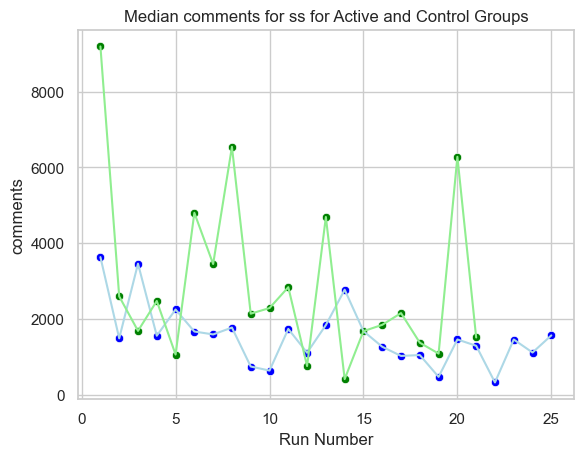

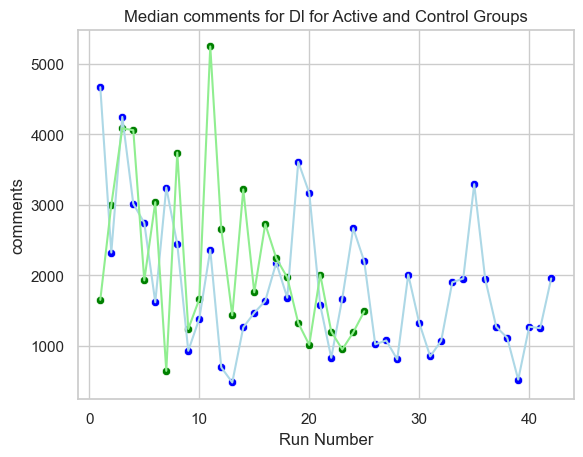

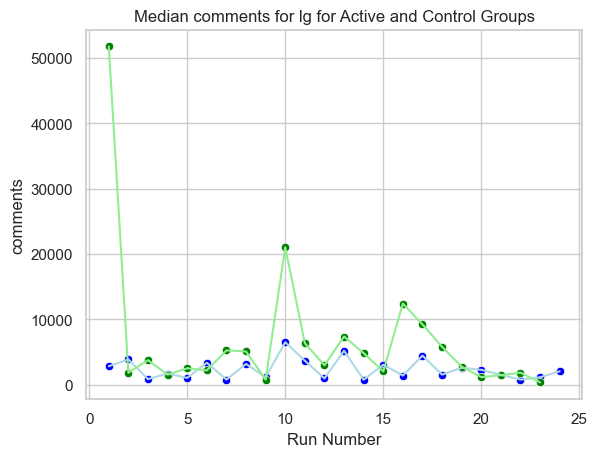

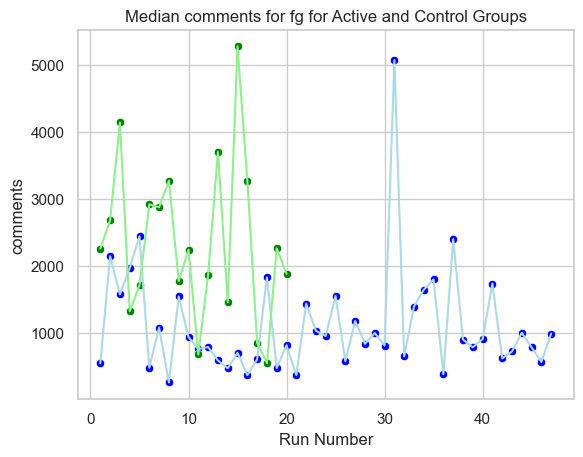

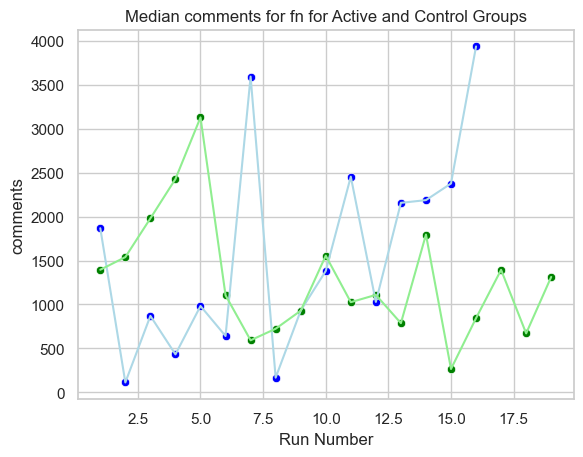

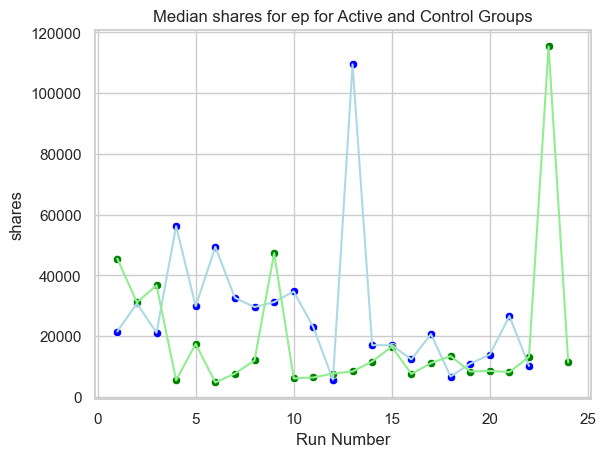

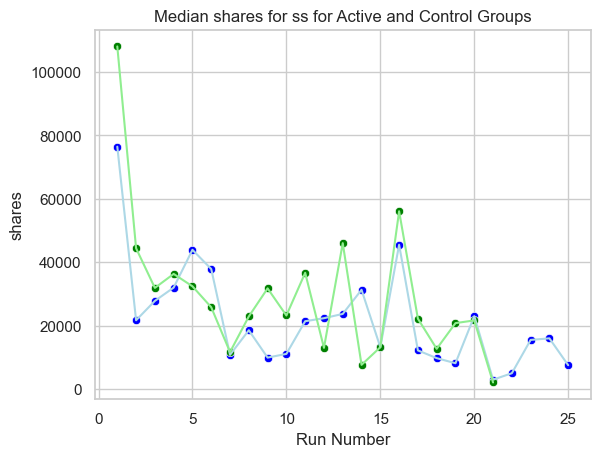

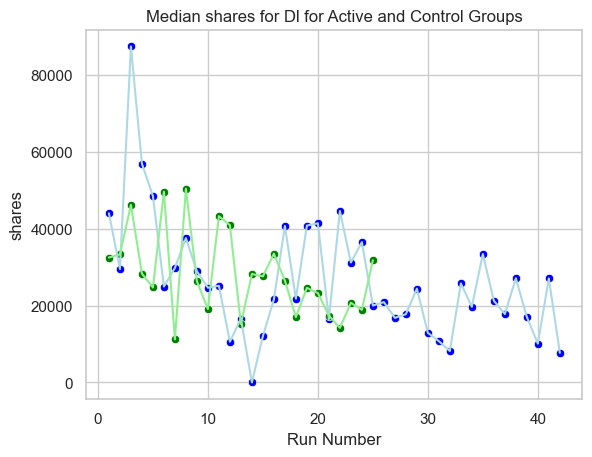

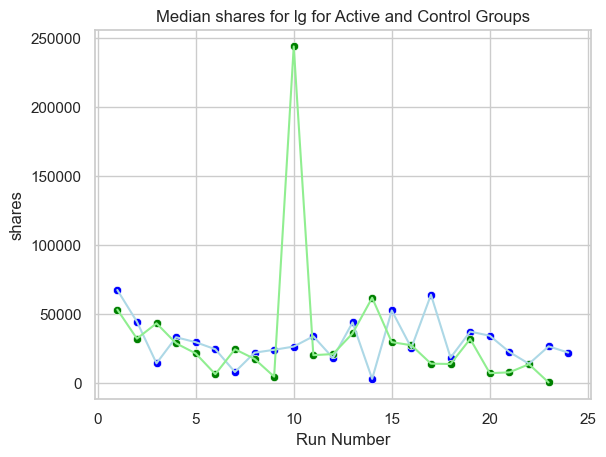

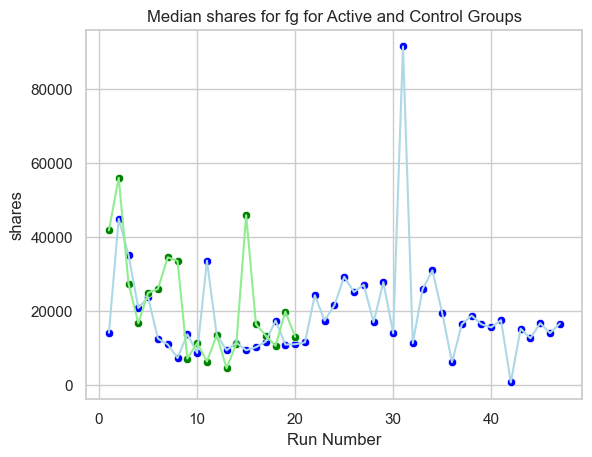

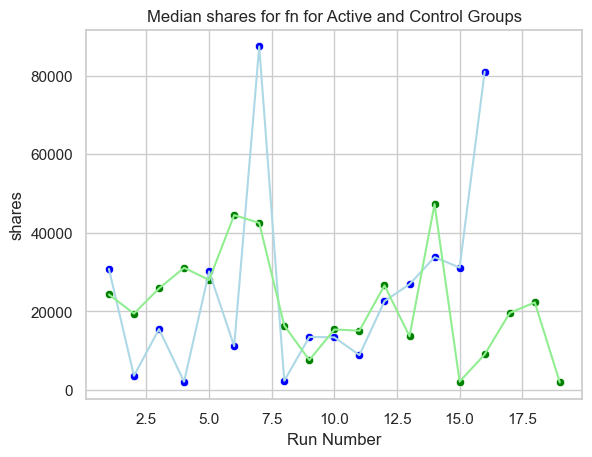

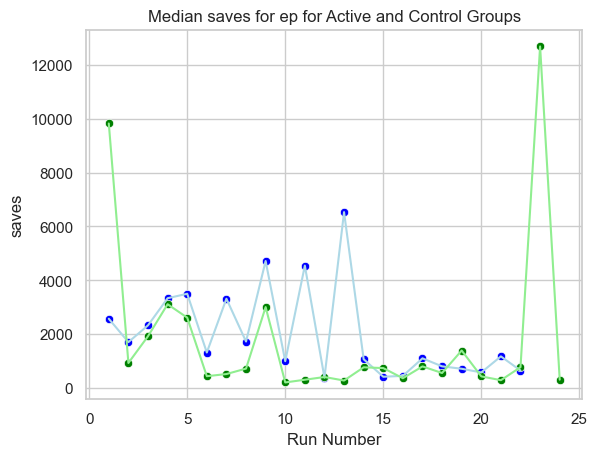

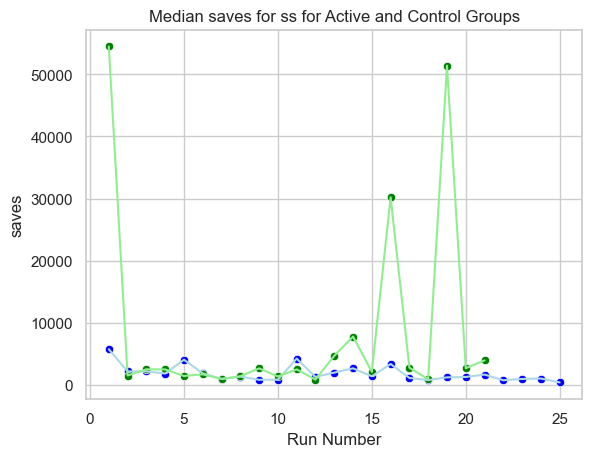

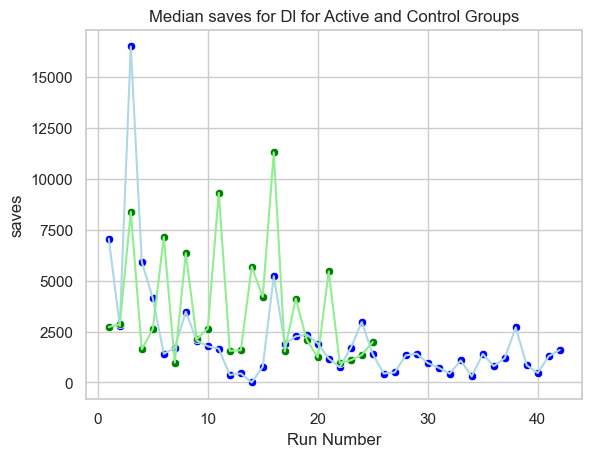

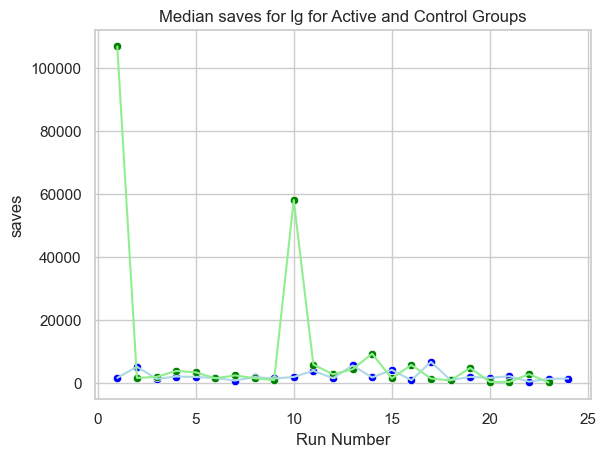

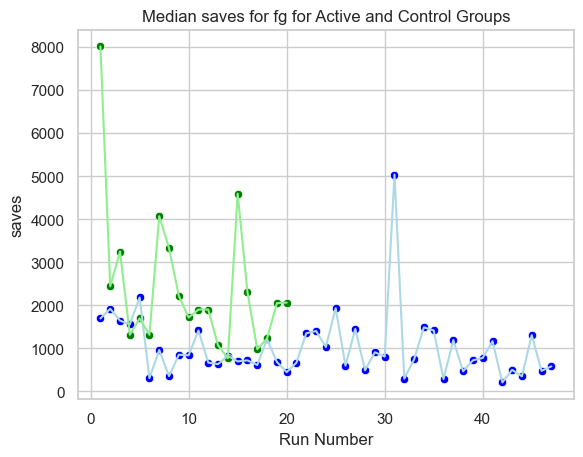

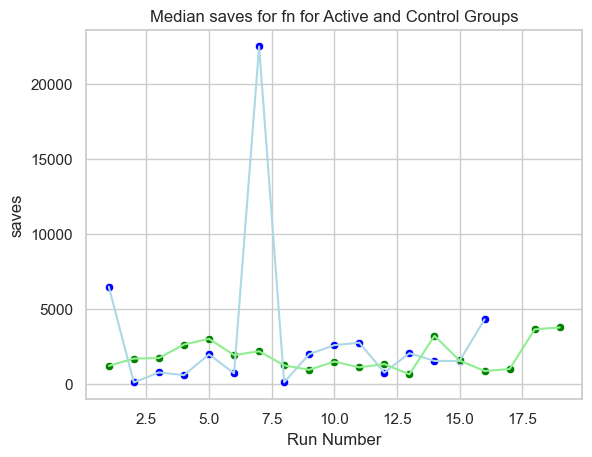

In [15]:
members = ["ep", "ss", "Dl", "lg", "fg", "fn"]
metrics = ["likes", "comments", "shares", "saves"]

for metric in metrics:
    for member in members:
        plot_metric_member(metric,member,df)

## **plot_metric_member Part 2**

Creates data frames for one person's control and active account and plots the mean for each run. This code adds in a legend and changes colors to the previously made plots

Each plot is saved in folder named "*visualizations*".

##### **Parameters**:
- **Metric**: *str*, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
- **Initial**: *str*, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)

In [16]:
df["group"] = ["active" if "activ" in row else 'control' for row in df['batchID']]
df

,batchID,run,batch,index,saved,author,likes,comments,shares,saves,music,hashtags,group
0,fn_activ_1_1_0,1,1,0,False,ina.katherine,3400000,30200,226400,94800,original sound - ina,NaN,active
1,fn_activ_1_1_1,1,1,1,False,leci.bby,280200,627,15500,164,original sound - fr0sty_rick,"['fyp%E3%82%B7', 'relatable', 'trending', 'ayl...",active
2,fn_activ_1_1_2,1,1,2,False,kassieemariee,689400,2198,73600,6060,original sound - Taj.Mahal,NaN,active
3,fn_activ_1_1_3,1,1,3,False,caseynicolaxx,29500,107,855,62,Rock With It by Saucy Santana - Saucy Santana,"['fyp', 'foryou', 'foryoupage', 'caseynicola',...",active
4,fn_activ_1_1_4,1,1,4,False,jailyneojeda,439800,1313,30800,965,original sound - Jailyne Ojeda,NaN,active
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8460,ep_cntrl_24_5_19,24,5,19,False,quedivertidotv1,7912,21,362,10,sonido original - Qué Divertido Tv,NaN,control
8461,ep_cntrl_24_5_20,24,5,20,False,familiapinaoficiial,228200,1110,14700,774,som original - Família.Pina.Oficial,NaN,control
8462,ep_cntrl_24_5_21,24,5,21,False,itssanya.1,124100,576,10700,109,original sound - Sanya,['@ucoolmediylashes'],control
8463,ep_cntrl_24_5_22,24,5,22,False,nayelilovera_,46300,662,6843,94,Love songs - ⭐️,"['fyp%E3%82%B7', 'trending', 'fyp', 'foryoupag...",control


In [17]:
# For each team member, create a separate dataframe containing their active data
ep_activ = df[df['batchID'].str.contains('ep_activ')]
ss_activ = df[df['batchID'].str.contains('ss_activ')]
fg_activ = df[df['batchID'].str.contains('fg_activ')]
fn_activ = df[df['batchID'].str.contains('fn_activ')]
lg_activ = df[df['batchID'].str.contains('lg_activ')]
dl_activ = df[df['batchID'].str.contains('Dl_activ')]

In [18]:
# For each team member, create a separate dataframe containing their control data
ep_cntrl = df[df['batchID'].str.contains('ep_cntrl')]
ss_cntrl = df[df['batchID'].str.contains('ss_cntrl')]
fg_cntrl = df[df['batchID'].str.contains('fg_cntrl')]
fn_cntrl = df[df['batchID'].str.contains('fn_cntrl')]
lg_cntrl = df[df['batchID'].str.contains('lg_cntrl')]
dl_cntrl = df[df['batchID'].str.contains('Dl_cntrl')]

##### We will concatenate each users two datasets to form one dataframe per memeber.

In [19]:
ep = pd.concat([ep_cntrl,ep_activ])
ss = pd.concat([ss_cntrl,ss_activ])
fg = pd.concat([fg_cntrl,fg_activ])
fn = pd.concat([fn_cntrl,fn_activ])
lg = pd.concat([lg_cntrl,lg_activ])
dl = pd.concat([dl_cntrl,dl_activ])

In [22]:
def plot_metric_member(metric, initial, df):
    '''
    Creates data frames for one person's control and active account and plots the mean for each run.

    Parameters:
        Metric: str, represents one of the following metrics of TikTok's popularity: likes, comments, shares, saves (only acceptable inputs)
        Initial: str, should represent one of six group members: ep, dl, lg, fg, fn, ss (only acceptable inputs)
    '''
    sns.set_theme(style="whitegrid")
    fig = sns.lineplot(x="run", 
                       y= metric,
                       data=df, 
                       hue="group",
                       marker='o',
                       errorbar=None)

    plt.title(f'Median {metric} for {initial} for Active and Control Groups')
    plt.xlabel('Run Number')
    plt.legend(loc='upper left',title="Legend")

    plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/{initial}_{metric}.png', bbox_inches='tight')
    plt.show()

##### Now we will run **plot_metric_member** once for each member (ep, dl, lg, fg, fn, ss).

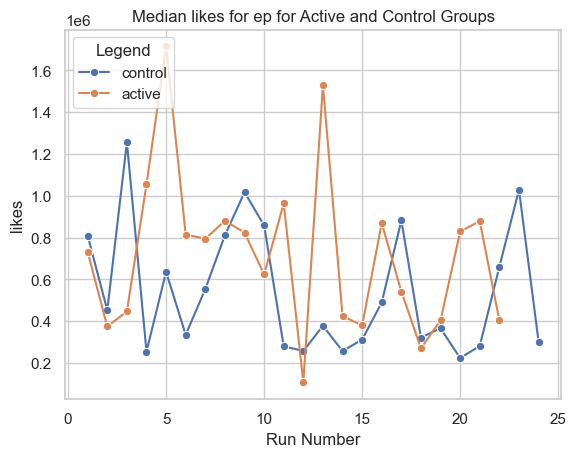

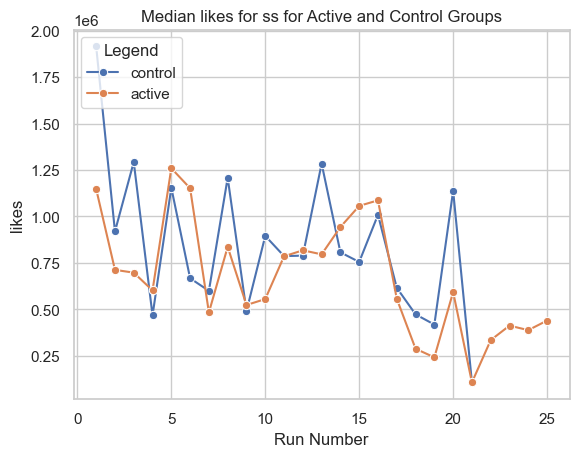

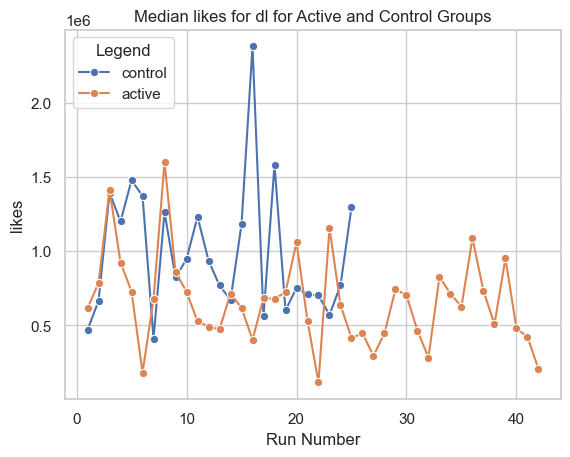

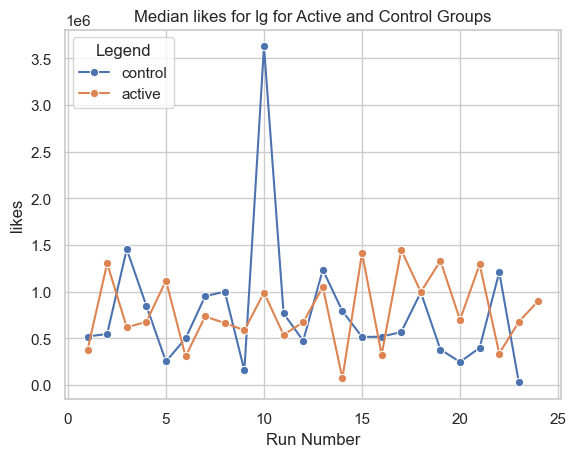

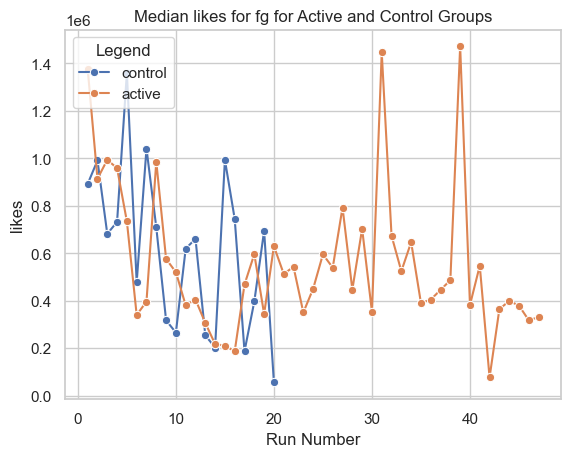

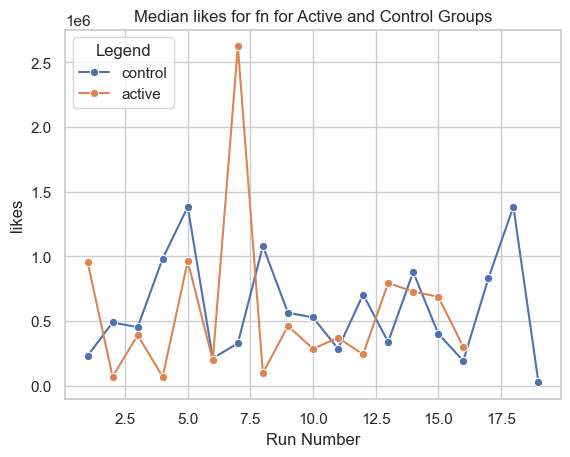

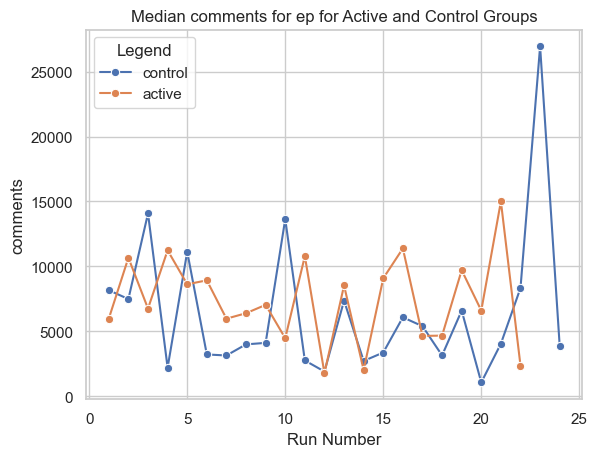

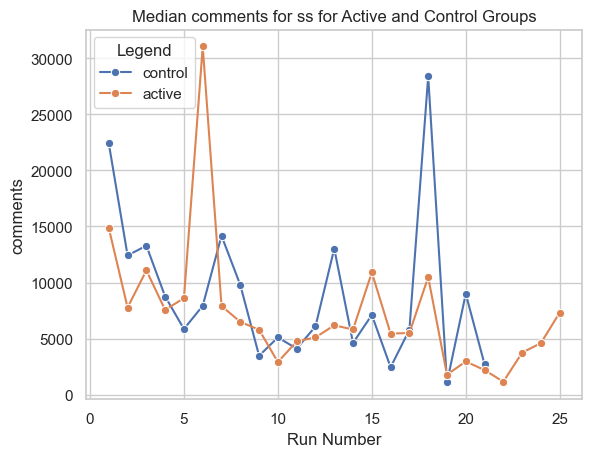

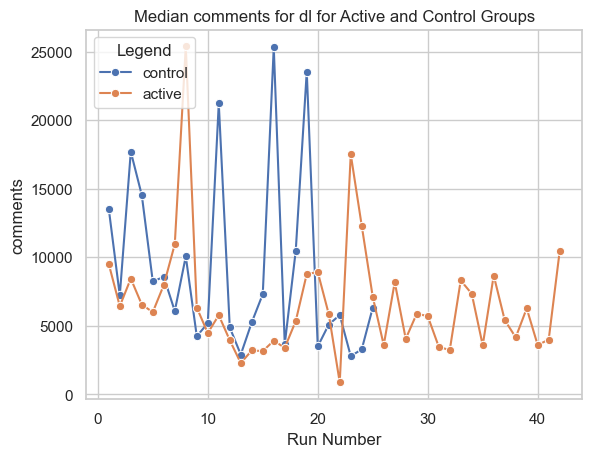

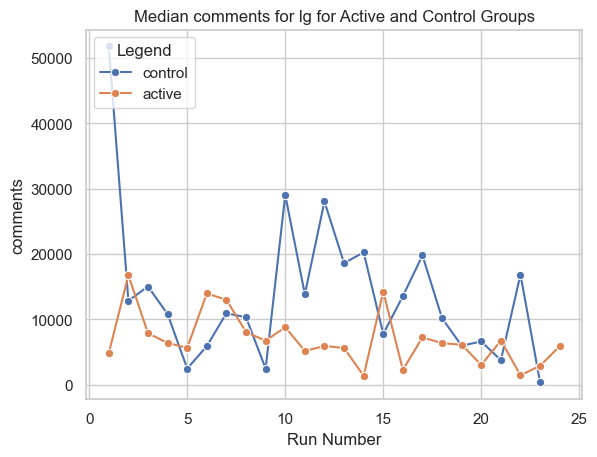

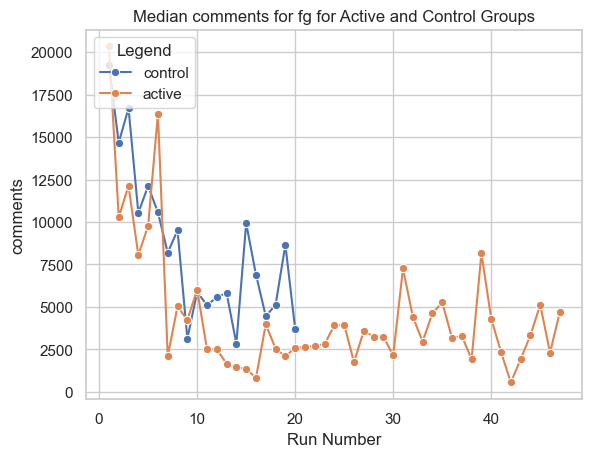

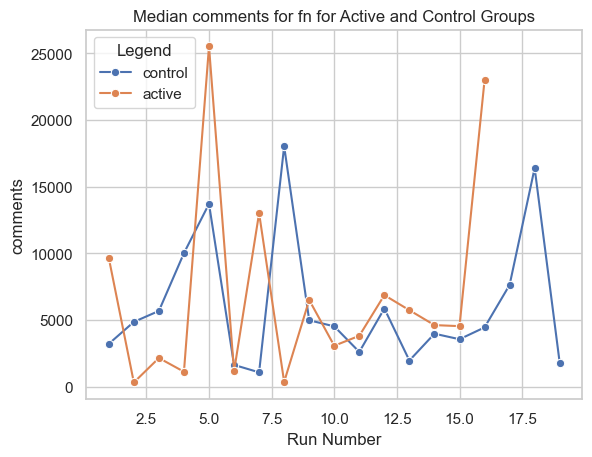

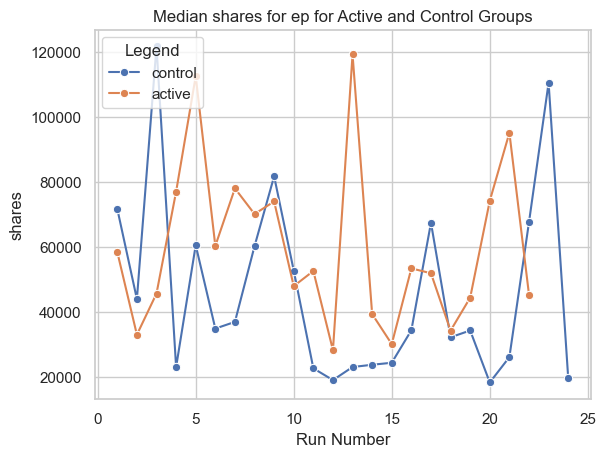

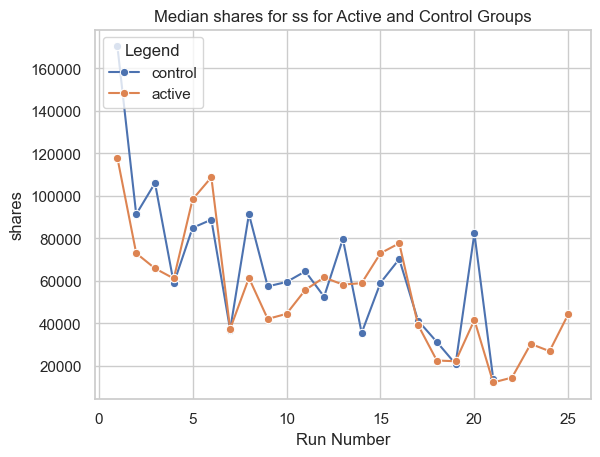

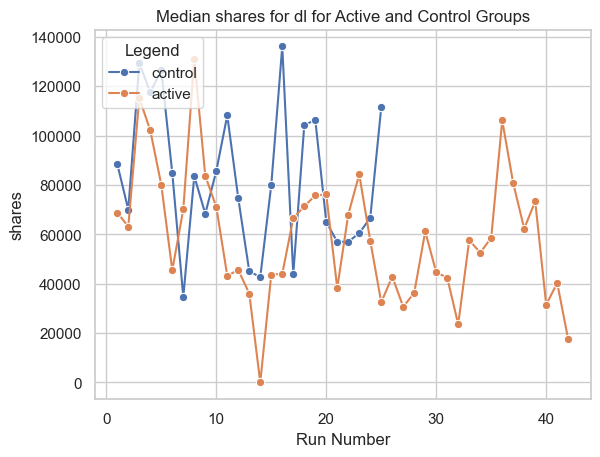

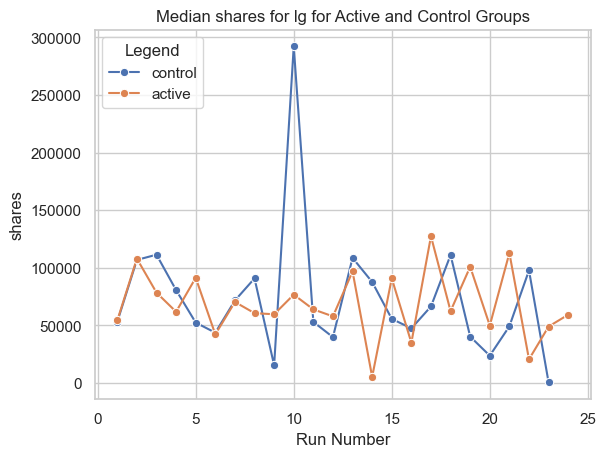

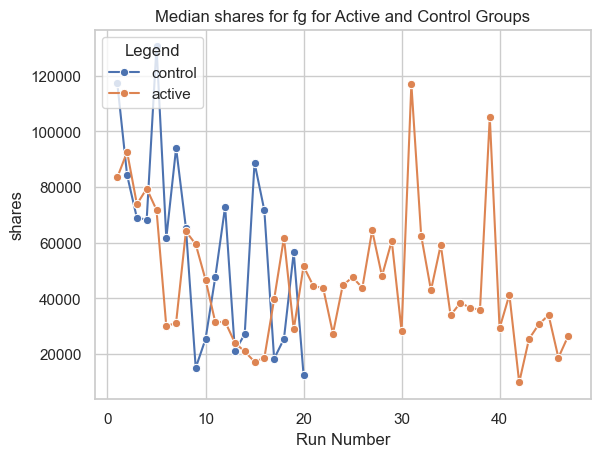

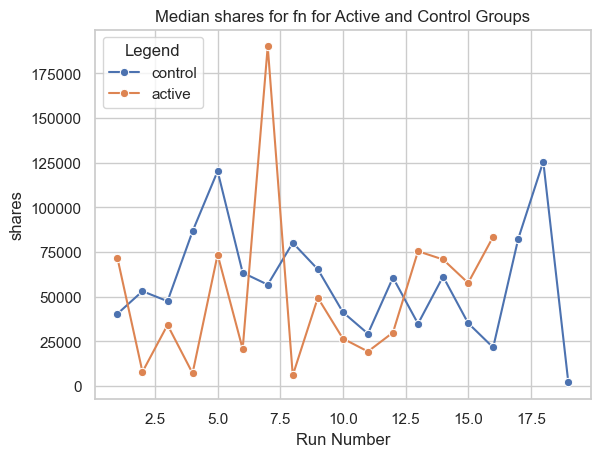

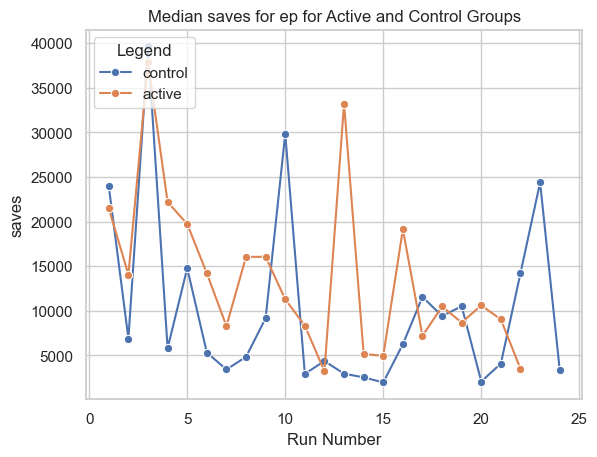

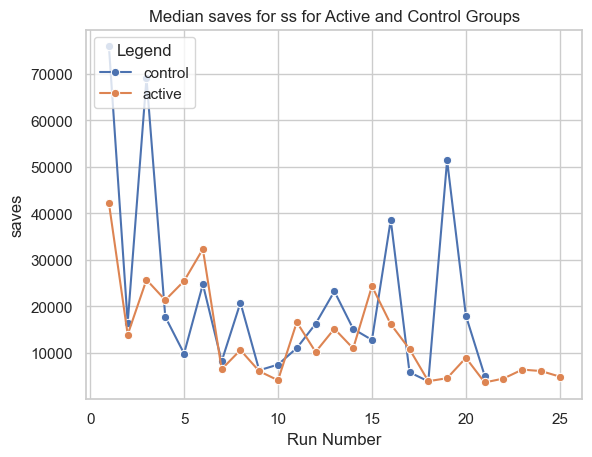

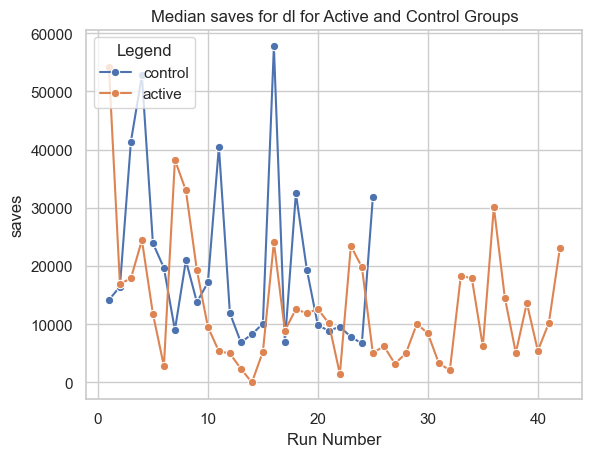

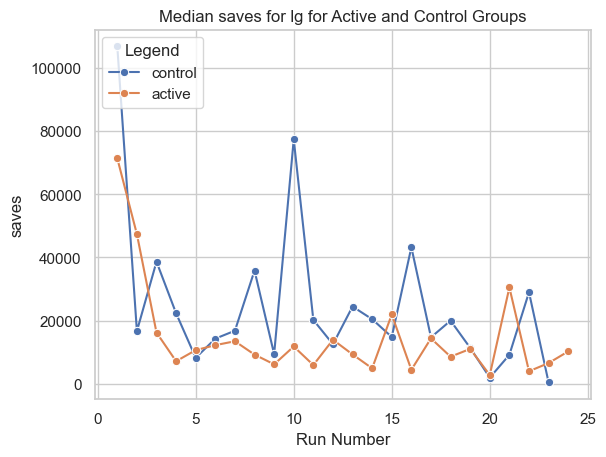

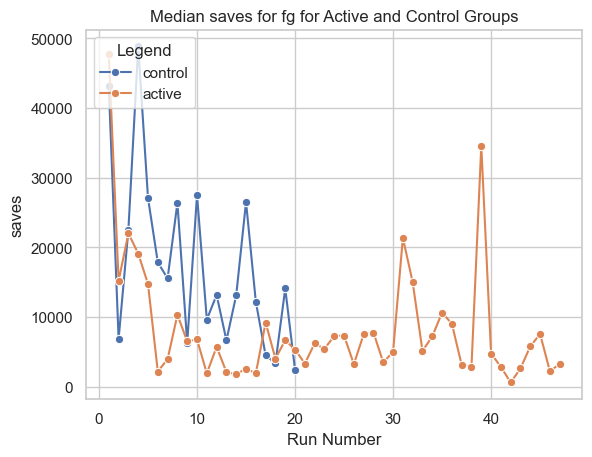

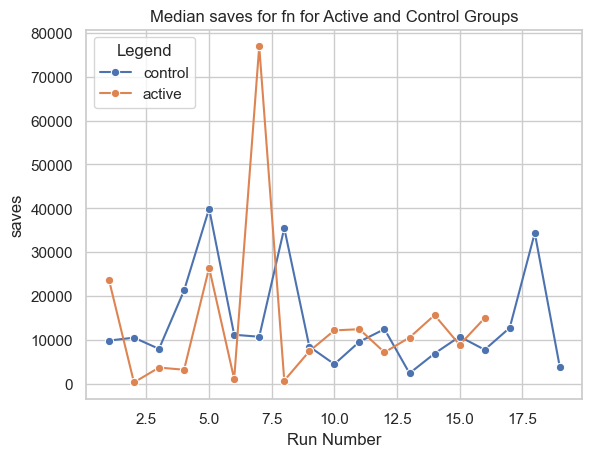

In [23]:
dfs = [ep, ss, dl, lg, fg, fn]
initials = ['ep', 'ss', 'dl', 'lg', 'fg', 'fn']
metrics = ["likes", "comments", "shares", "saves"]

for metric in metrics:
    for i in range(len(dfs)):
        plot_metric_member(metric, initials[i], dfs[i])

## **countAllHashtags**

Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object (*a global variable*) to keep track of all hashtags.

##### The following code collects frequency for all hashtags.

In [29]:
cnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        cnt.update(htList) # method update of Counter takes a list and updates all keys
_ = df['hashtags'].apply(countAllHashtags)
all_hashtagfreq = cnt.most_common(25)
all_hashtagfreq

[("'fyp'", 1173),
 ("['fyp'", 987),
 ("'viral'", 768),
 ("'foryou'", 704),
 ("'fyp%E3%82%B7'", 453),
 ("'foryoupage'", 380),
 ("'fyp']", 367),
 ("'funny'", 294),
 ("'trending'", 272),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 226),
 ("'relatable'", 174),
 ("['foryou'", 174),
 ("'viralvideo'", 163),
 ("'viral']", 162),
 ("['fyp%E3%82%B7'", 161),
 ("'tiktok'", 158),
 ("['fyp']", 156),
 ("'couple'", 140),
 ("'foryou']", 137),
 ("'fy'", 123),
 ("'trend'", 117),
 ("'dance'", 99),
 ("'foryoupage']", 97),
 ("['viral'", 96),
 ("'blowthisup'", 94)]

##### The following code collects frequency for all hashtags shown in **control** accounts.

In [30]:
control = pd.concat([ep_cntrl,ss_cntrl,fg_cntrl,lg_cntrl,dl_cntrl])
controlCnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        controlCnt.update(htList) # method update of Counter takes a list and updates all keys
        
_ = control['hashtags'].apply(countAllHashtags)
control_hashtagfreq = controlCnt.most_common(25)
control_hashtagfreq

[("'fyp'", 317),
 ("['fyp'", 240),
 ("'viral'", 213),
 ("'foryou'", 183),
 ("'fyp%E3%82%B7'", 142),
 ("'foryoupage'", 125),
 ("'fyp']", 93),
 ("'funny'", 82),
 ("'trending'", 70),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 67),
 ("'viralvideo'", 60),
 ("['foryou'", 43),
 ("'tiktok'", 43),
 ("'fy'", 43),
 ("'viral']", 38),
 ("['fyp%E3%82%B7'", 38),
 ("'fypage'", 36),
 ("'foryou']", 33),
 ("'therian'", 31),
 ("'fyppppppppppppppppppppppp'", 31),
 ("'relatable'", 31),
 ("'couple'", 31),
 ("'therianthropy'", 28),
 ("['viral'", 28),
 ("['fyp']", 28)]

##### The following code collects frequency for all hashtags shown in **active** accounts.

In [31]:
active = pd.concat([ep_activ,ss_activ,fg_activ,lg_activ,dl_activ])
activeCnt = Counter()
def countAllHashtags(cell):
    """
    Takes a string or a NaN value. Splits the srings to find hashtags, updates a Counter object
    (a global variable) to keep track of all hashtags.
    """
    if type(cell) == str: # avoid NaN values, which are float
        htList = [el.strip() for el in cell.split(',')] # prepare individual hashtags
        activeCnt.update(htList) # method update of Counter takes a list and updates all keys
        
_ = active['hashtags'].apply(countAllHashtags)
active_hashtagfreq = controlCnt.most_common(25)
active_hashtagfreq

[("'fyp'", 317),
 ("['fyp'", 240),
 ("'viral'", 213),
 ("'foryou'", 183),
 ("'fyp%E3%82%B7'", 142),
 ("'foryoupage'", 125),
 ("'fyp']", 93),
 ("'funny'", 82),
 ("'trending'", 70),
 ("'fyp%E3%82%B7%E3%82%9Aviral'", 67),
 ("'viralvideo'", 60),
 ("['foryou'", 43),
 ("'tiktok'", 43),
 ("'fy'", 43),
 ("'viral']", 38),
 ("['fyp%E3%82%B7'", 38),
 ("'fypage'", 36),
 ("'foryou']", 33),
 ("'therian'", 31),
 ("'fyppppppppppppppppppppppp'", 31),
 ("'relatable'", 31),
 ("'couple'", 31),
 ("'therianthropy'", 28),
 ("['viral'", 28),
 ("['fyp']", 28)]

##### Cleaning the hashtag list and turning it into a dataframe.

In [32]:
delete = ['fyp', 'foryou', 'fy', 'fypage', 'foryoupage', 'viral','trending','tiktok']
def clean_hashtag(hashfreq):
    """
    Clean the hashtag list and turn it into a dataframe
    """
    hashtags = []
    freqs = []
    for hashtag, freq in hashfreq:
        #change the hashtag into readable format
        if '%' in hashtag:
            hashtag = urllib.parse.unquote(hashtag)
        #reformat the hashtags
        hashtag = hashtag.replace("'","")
        hashtag = hashtag.replace("[","")
        hashtag = hashtag.replace("]","")
        #check if we want the hashtag
        if (hashtag not in delete) and ('fyp' not in hashtag):
            hashtags.append(hashtag)
            freqs.append(freq)
    #generate dataframe
    df = pd.DataFrame()
    df["hashtag"] = hashtags
    df["freq"] = freqs
    return df

##### Creating a bargraph representation of frequency.

In [51]:
  def get_hashfreq_bar(df, group):
    """
    Takes in a dataframe as an input and generate a bar graph 
    """
    plt.bar(df["hashtag"],df["freq"], color ='lightseagreen', width = 0.4)
 
    plt.xlabel("Hashtags")
    plt.ylabel("No. of times the hashtage appears")
    plt.title(f"Frequencies of Hashtag for {group} group")

    plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/{group}_bargraph.png', bbox_inches='tight')
    plt.show()

##### Creating a piechart representation of frequency.

In [52]:
def get_hashfreq_pie(df, group):
    """
    Takes in a dataframe as an input and generate a pie chart 
    """
    df["percent"] = (df['freq']/df['freq'].sum())*100
    y = df["freq"]
    mylabels = df["hashtag"]

    plt.pie(y, labels = mylabels)
    plt.title(f"Frequencies of Hashtag for {group} group")

    plt.savefig(f'/Users/fernandagonzalez/Desktop/school/CS 315/CS315_Project1/data_analysis/vizualizations/{group}_piechart.png', bbox_inches='tight')
    plt.show() 

##### Cleaning hashtags for **all**, **active**, and **control**.

In [53]:
df_all = clean_hashtag(all_hashtagfreq)
df_active = clean_hashtag(active_hashtagfreq)
df_control = clean_hashtag(control_hashtagfreq)

##### Creating a bargraph representation of frequency for **all**.

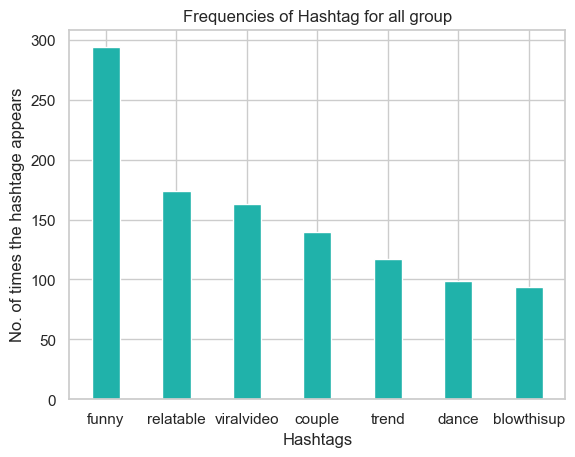

In [54]:
get_hashfreq_bar(df_all, 'all')

##### Creating a piechart representation of frequency for **active**.

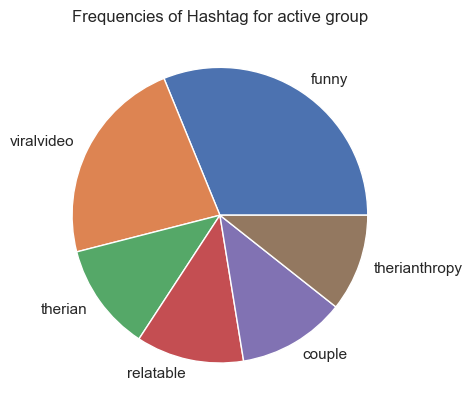

In [55]:
get_hashfreq_pie(df_active, 'active')

##### Creating a piechart representation of frequency of **control**.

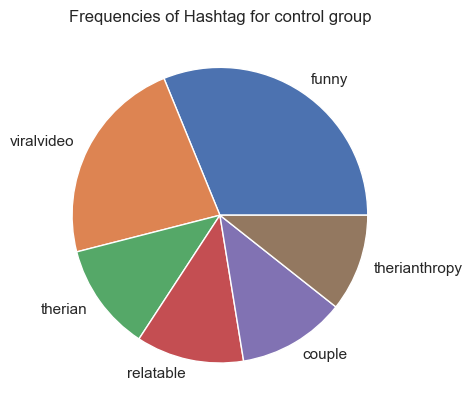

In [56]:
get_hashfreq_pie(df_control, 'control')

## **plot_differences**